<div style="text-align: center;">
    <h2 style="font-size: 36px; font-weight: bold; color: #2E8B57;">Diabetes Prediction</h2>
    <p style="font-size: 22px;">
        <a href="https://github.com/codewithdark-git" 
           style="text-decoration: none; color:rgb(73, 128, 6); transition: color 0.3s ease-in-out;" 
           onmouseover="this.style.color='#0077B5';" 
           onmouseout="this.style.color='rgb(73, 128, 6)';">
            GitHub
        </a> | 
        <a href="https://www.linkedin.com/in/codewithdark" 
           style="text-decoration: none; color: #0077B5; transition: color 0.3s ease-in-out;" 
           onmouseover="this.style.color='#333';" 
           onmouseout="this.style.color='#0077B5';">
            LinkedIn
        </a> | 
        <a href="https://www.kaggle.com/codewithdark" 
           style="text-decoration: none; color: #00A859; transition: color 0.3s ease-in-out;" 
           onmouseover="this.style.color='#333';" 
           onmouseout="this.style.color='#00A859';">
            Kaggle
        </a>
    </p>
</div>


<hr style="border-top: 2px solid #2E8B57; margin: 20px 0;">

**Author:** [Ahsan Umar](https://www.linkedin.com/in/codewithdark)

**Date:** 2024-12-27

**Description:**  
This notebook provides an **exploratory data analysis** and **machine learning model development** for the Pima Indians Diabetes Dataset. The dataset is used to predict the likelihood of diabetes in patients based on various factors like age, BMI, blood pressure, etc.

**Dataset Link:** [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

---

### Objectives:
* Explore and preprocess the dataset.
* Develop a machine learning model to predict diabetes.
* Evaluate the model's performance.

### Technologies Used:
* **Python 3.x**
* **Pandas** for data manipulation
* **NumPy** for numerical operations
* **Scikit-learn** for machine learning
* **Matplotlib** and **Seaborn** for visualization


In [8]:
#!/bin/bash
!kaggle datasets download iammustafatz/diabetes-prediction-dataset
import zipfile
import os

# Specify the path to the zip file
zip_file_path = 'diabetes-prediction-dataset.zip'
extract_to_path = '.'

# Create the directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Files extracted to {extract_to_path}")


Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Files extracted to .


In [1]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
# Data shape and Variable types
#print(df.head())
print("#"*50)
print(df.info())

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# Missing values count
df.isnull().sum()
# Missing values percentage
round(df.isnull().sum()/df.shape[0],2)

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

In [6]:
# Balanced or Unbalanced data 
round(df["diabetes"].value_counts()/df.shape[0]*100,0).astype(int).astype(str) + "%"

diabetes
0    92%
1     8%
Name: count, dtype: object

In [7]:
# univarie analysis 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
def get_column_types(df):
    """
    This function returns the names of object (categorical) columns and numeric columns in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    dict: A dictionary with keys 'object_columns' and 'numeric_columns'.
    """
    object_columns = df.select_dtypes(include='object').columns.tolist()
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    return {
        "object_columns": object_columns,
        "numeric_columns": numeric_columns
    }
get_column_types(df)

{'object_columns': ['gender', 'smoking_history'],
 'numeric_columns': ['age',
  'hypertension',
  'heart_disease',
  'bmi',
  'HbA1c_level',
  'blood_glucose_level',
  'diabetes']}

In [9]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to Gender and smoking_history
df["gender"] = le.fit_transform(df["gender"])
df["smoking_history"] = le.fit_transform(df["smoking_history"])

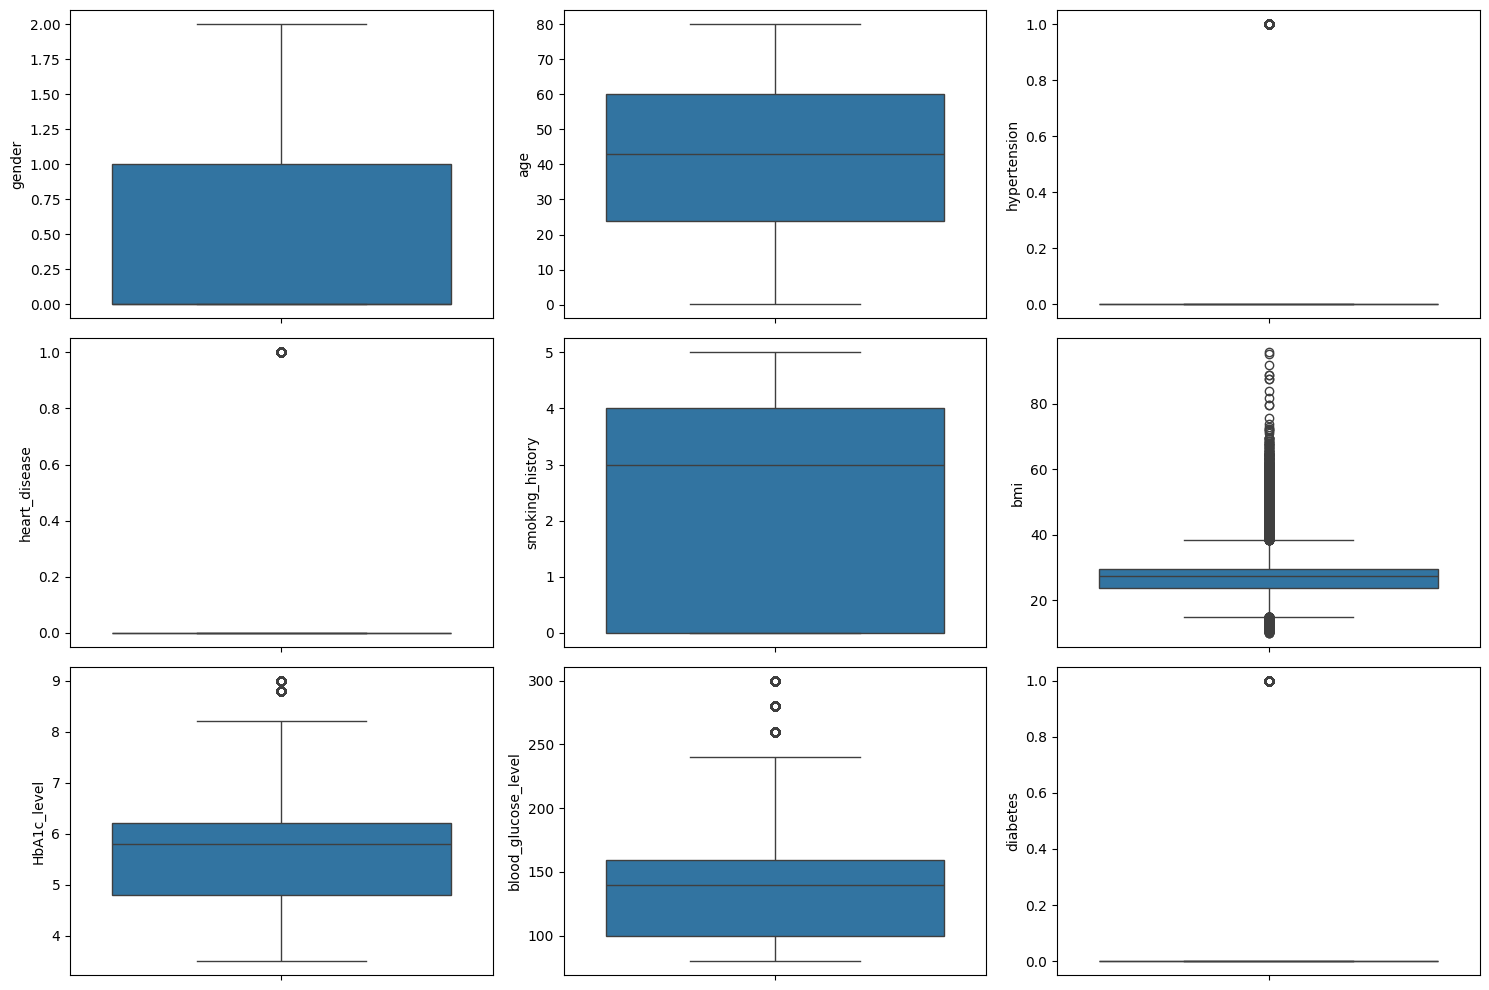

In [10]:
# Outliers
import seaborn as sns 
fig, axes = plt.subplots(3,3, figsize=(15,10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row, col_position])
    plt.tight_layout()
plt.show()

In [11]:
# Lets calculate mutual information then move on to visualize correlation and mutual information
from sklearn.feature_selection import mutual_info_classif
tdf = df.copy()  
x = tdf.drop(columns='diabetes')
y = tdf['diabetes']
mi = mutual_info_classif(x,y)
mi_df = pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

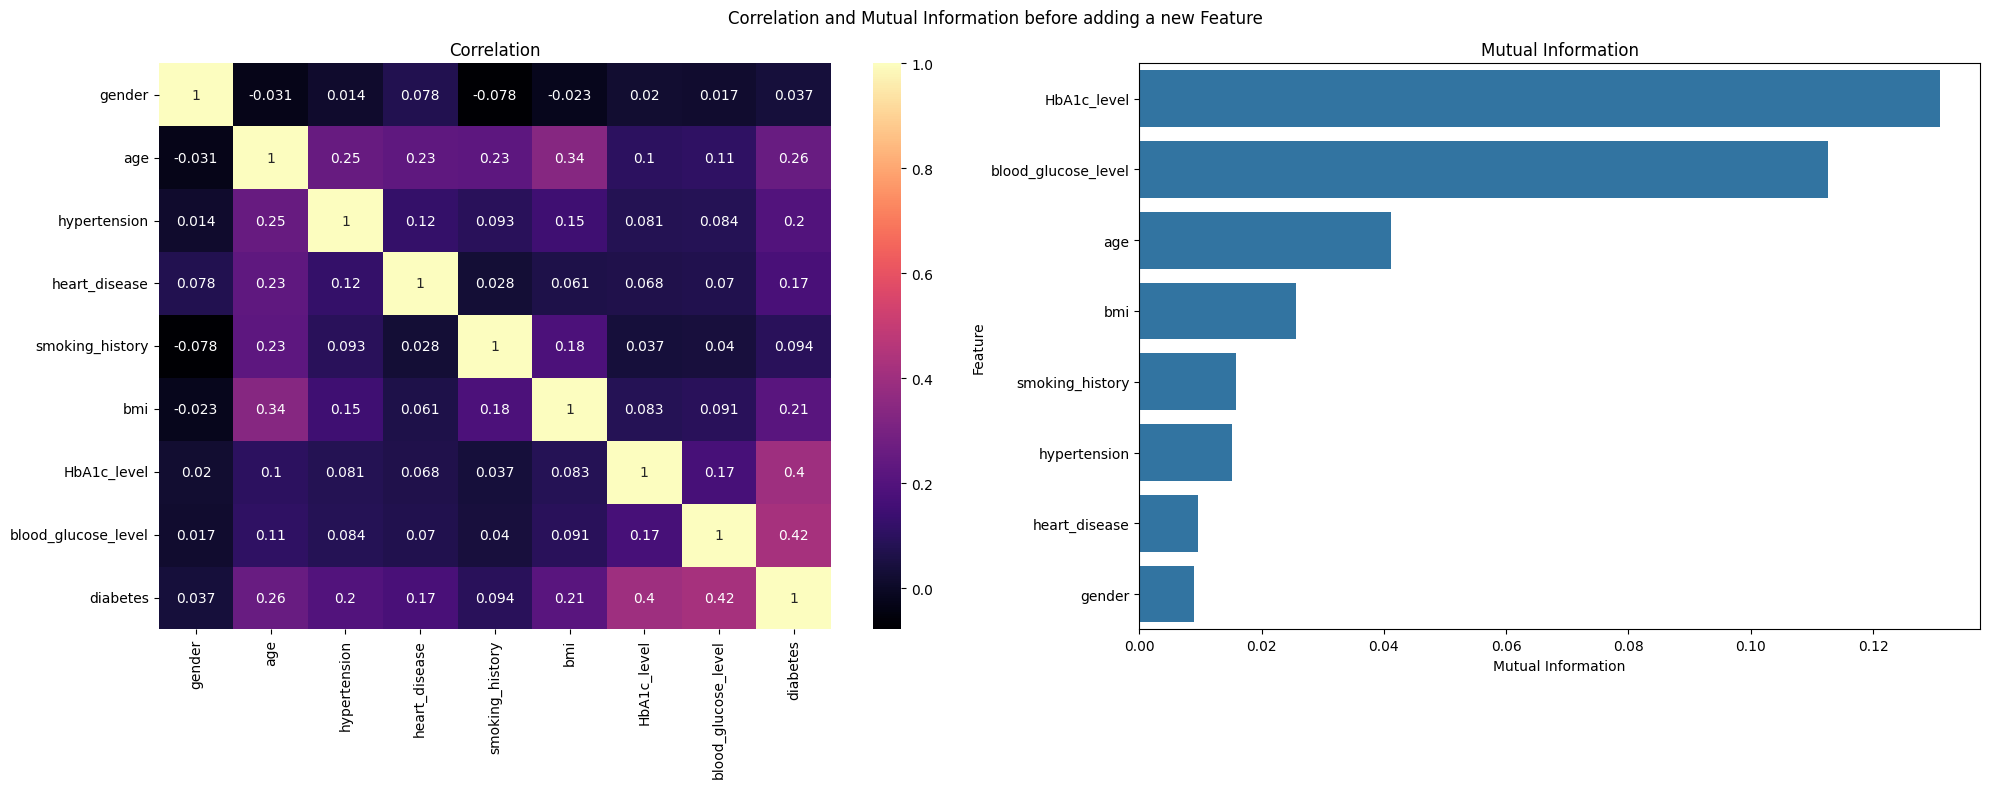

In [12]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
max = df['age'].max()
min = df['age'].min()
print(max,min)
bins=[20,36,51,66,float('inf')]  # Define bin edges
labels=['Young Adults','Middle-Aged Adults','Older Adults','Seniors']  # Define labels
df['Age_Category']=pd.cut(df['age'],bins=bins,labels=labels, right=True)
df['Age_Category']=pd.cut(df['age'],bins=bins,labels=labels, right=True)
# Initialize the encoder
on = OrdinalEncoder()

le=LabelEncoder()
df['Age_Category']=le.fit_transform(df['Age_Category']) # Encoding categorical column
df['Normalized_Age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())

80.0 0.08


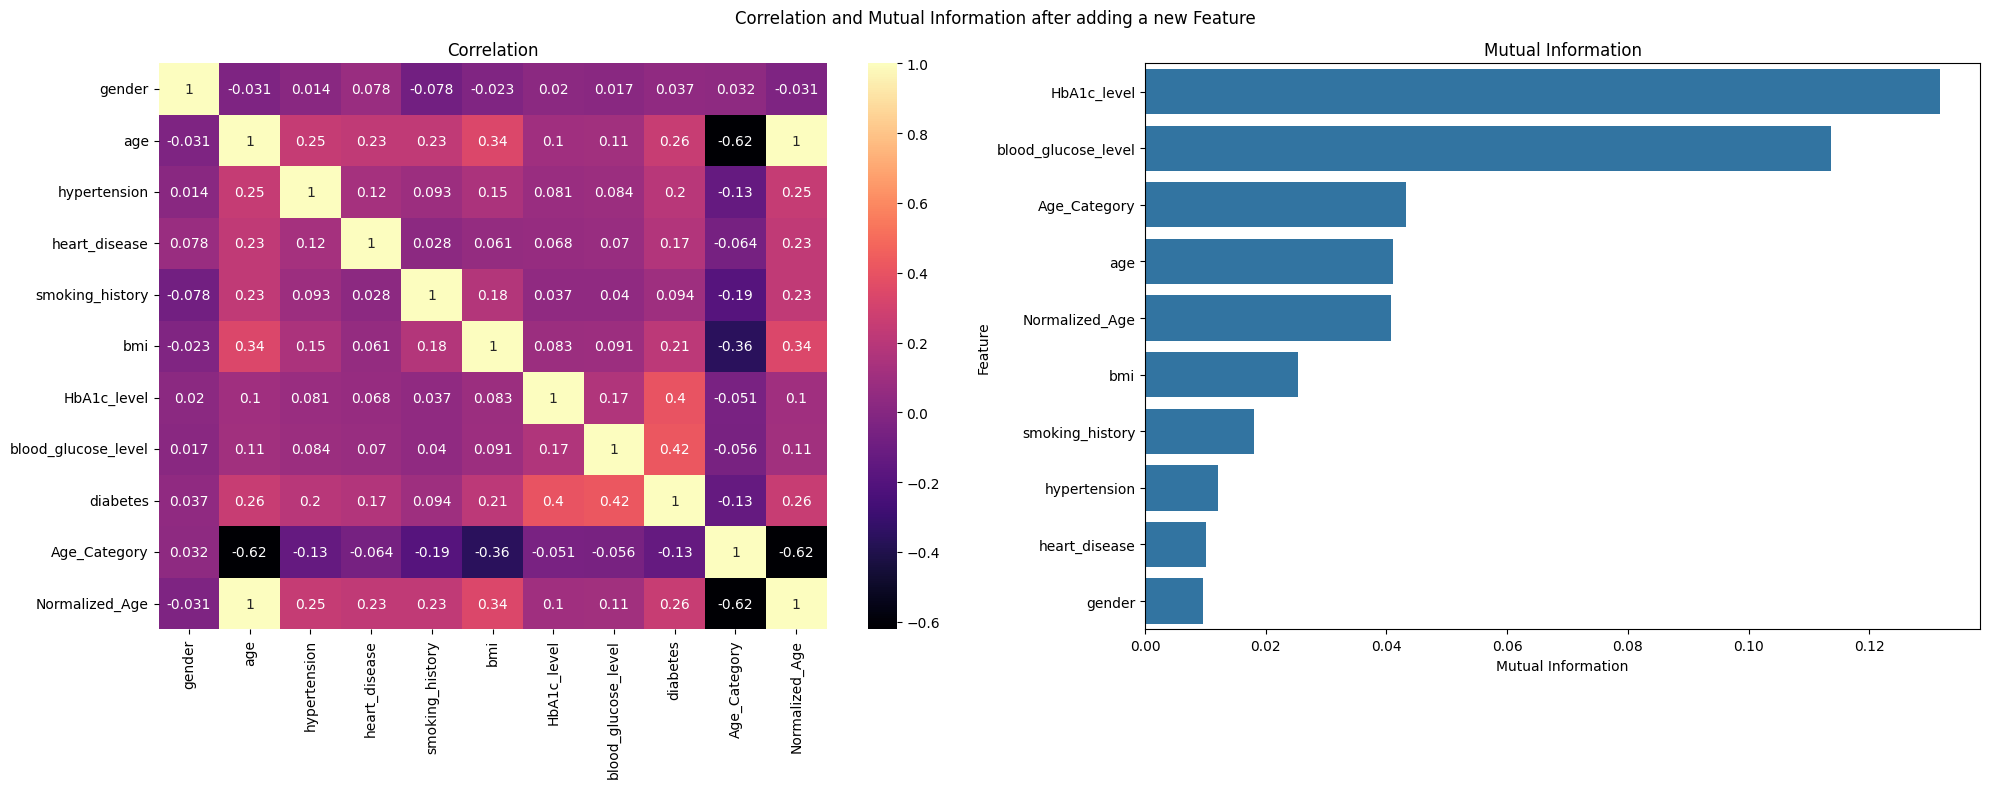

In [14]:
tdf=df.copy()  
x=tdf.drop(columns='diabetes')
y=tdf['diabetes']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information after adding a new Feature')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplaceWithMedian(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        """
        Initialize the OutlierRemover with the columns to check for outliers
        and the IQR threshold for detecting them.
        
        Parameters:
        cols (list): List of column indices or names to check for outliers.
        threshold (float): Multiplier for the IQR to define outliers. Typically 1.5 or 3.
        """
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for outlier removal
    
    def transform(self, X):
        # Check if X is a DataFrame or a NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # Convert NumPy array to DataFrame to handle columns by name
            data = pd.DataFrame(X)
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Replace outliers with the median value
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            
            # Compute the median of the column
            median = data[col].median()

            # Replace outliers with the median
            data[col] = np.where(data[col] > upper_bound, median, data[col])  # Replace high outliers with the median
            data[col] = np.where(data[col] < lower_bound, median, data[col])  # Replace low outliers with the median
        
        return data.values  # Return as a NumPy array for compatibility with scikit-learn

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
from sklearn.cluster import KMeans, AgglomerativeClustering , DBSCAN
k_mean_model = KMeans(n_clusters=5) # After check te elbow method
cluster_labels = k_mean_model.fit_predict(df_scaled)

In [17]:
df["cluster"]= cluster_labels

In [18]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Age_Category,Normalized_Age,cluster
0,0,80.0,0,1,4,25.19,6.6,140,0,2,1.000000,4
1,0,54.0,0,0,0,27.32,6.6,80,0,1,0.674675,1
2,1,28.0,0,0,4,27.32,5.7,158,0,3,0.349349,0
3,0,36.0,0,0,1,23.45,5.0,155,0,3,0.449449,3
4,1,76.0,1,1,1,20.14,4.8,155,0,2,0.949950,4


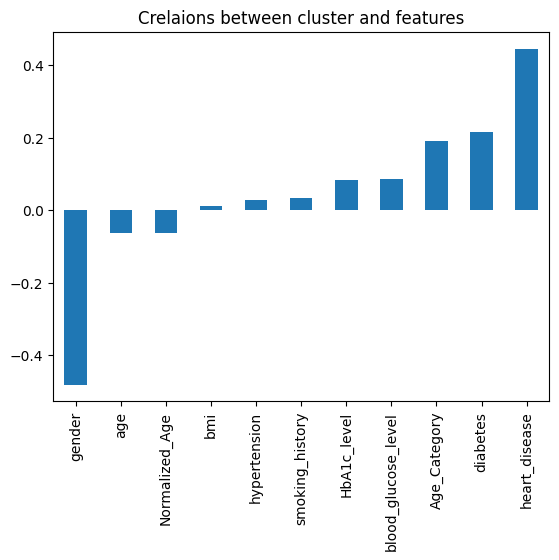

In [19]:
plt.Figure(figsize=(12,6), dpi=200)
df.corr()['cluster'].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Crelaions between cluster and features")
plt.show()

In [20]:
df= pd.get_dummies(df, columns=['cluster'], drop_first=True).astype(int)
df= pd.get_dummies(df, columns=['gender'], drop_first=True).astype(int)
df= pd.get_dummies(df, columns=['smoking_history'], drop_first=True).astype(int)

In [21]:
df= pd.get_dummies(df, columns=['hypertension'], drop_first=True).astype(int)
df= pd.get_dummies(df, columns=['heart_disease'], drop_first=True).astype(int)

In [22]:
df.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,Age_Category,Normalized_Age,cluster_1,cluster_2,cluster_3,cluster_4,gender_1,gender_2,smoking_history_1,smoking_history_2,smoking_history_3,smoking_history_4,smoking_history_5,hypertension_1,heart_disease_1
0,80,25,6,140,0,2,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1,54,27,6,80,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,28,27,5,158,0,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,36,23,5,155,0,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,76,20,4,155,0,2,0,0,0,0,1,1,0,1,0,0,0,0,1,1


In [23]:
def add_stat_columns(df, columns):
    """
    Add statistical summary columns (mean, std, min, max) for specified numeric columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to compute statistics for.

    Returns:
    pd.DataFrame: The DataFrame with added statistical summary columns.
    """
    for col in columns:
        if col in df.columns:  # Ensure the column exists in the DataFrame
            mean_col = f"{col}_mean"
            sd_col = f"{col}_sd"
            min_col = f"{col}_min"
            max_col = f"{col}_max"
            df[mean_col] = df[col].mean()
            df[sd_col] = df[col].std()
            df[min_col] = df[col].min()
            df[max_col] = df[col].max()
    
    return df

# Example usage
columns_to_process = ["bmi", "HbA1c_level", "blood_glucose_level"]
df = add_stat_columns(df, columns_to_process)

In [24]:
df.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,Age_Category,Normalized_Age,cluster_1,cluster_2,cluster_3,...,bmi_min,bmi_max,HbA1c_level_mean,HbA1c_level_sd,HbA1c_level_min,HbA1c_level_max,blood_glucose_level_mean,blood_glucose_level_sd,blood_glucose_level_min,blood_glucose_level_max
0,80,25,6,140,0,2,1,0,0,0,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300
1,54,27,6,80,0,1,0,1,0,0,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300
2,28,27,5,158,0,3,0,0,0,0,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300
3,36,23,5,155,0,3,0,0,0,1,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300
4,76,20,4,155,0,2,0,0,0,0,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300


In [25]:
from sklearn.model_selection import train_test_split
x= df.drop(columns='diabetes')
y= df['diabetes']

In [26]:
df.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,Age_Category,Normalized_Age,cluster_1,cluster_2,cluster_3,...,bmi_min,bmi_max,HbA1c_level_mean,HbA1c_level_sd,HbA1c_level_min,HbA1c_level_max,blood_glucose_level_mean,blood_glucose_level_sd,blood_glucose_level_min,blood_glucose_level_max
0,80,25,6,140,0,2,1,0,0,0,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300
1,54,27,6,80,0,1,0,1,0,0,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300
2,28,27,5,158,0,3,0,0,0,0,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300
3,36,23,5,155,0,3,0,0,0,1,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300
4,76,20,4,155,0,2,0,0,0,0,...,10,95,5.13244,1.101114,3,9,138.05806,40.708136,80,300


In [27]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=.25,random_state=42)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
# numerics = ['int64', 'float64']
# num_data = data_tr.select_dtypes(include=numerics)

num_pipeline = Pipeline([
        ('outlier_remover', OutlierReplaceWithMedian(cols=[0, 1, 4, 5, 6, 7, 8, 9], threshold=1.5)),
        ('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
         
])

X_train_scaler = num_pipeline.fit_transform(X_train)
X_test_scaler = num_pipeline.fit_transform(X_test)

# X_train_scaler = x_t
# X_test_scaler = x_te

In [53]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 30/31 [01:42<00:04,  4.37s/it]

[LightGBM] [Info] Number of positive: 6350, number of negative: 68650
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.372466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084667 -> initscore=-2.380566
[LightGBM] [Info] Start training from score -2.380566


100%|██████████| 31/31 [01:45<00:00,  3.41s/it]


In [54]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,4.55
XGBClassifier,1.00,1.00,1.00,1.00,2.01
BaggingClassifier,1.00,1.00,1.00,1.00,2.27
LGBMClassifier,1.00,1.00,1.00,1.00,3.47
RandomForestClassifier,1.00,1.00,1.00,1.00,8.41
ExtraTreesClassifier,1.00,1.00,1.00,1.00,7.31
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.37
Perceptron,1.00,1.00,1.00,1.00,0.36
SVC,1.00,1.00,1.00,1.00,26.81


In [29]:
import pandas as pd

def print_model_results(grid_search, best_model, f1, con_mat, accuracy, pre_scr, rec_scr):
    """
    Print the results of the model training in a structured and readable format.
    """
    print(f"--- {best_model.__class__.__name__} Evaluation ---")
    print(f"\nBest Hyperparameters: {grid_search.best_params_}")
    
    print("\nPerformance Metrics:")
    print(f"  - F1 Score: {f1:.4f}")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {pre_scr:.4f}")
    print(f"  - Recall: {rec_scr:.4f}")

    # Confusion matrix
    print("\nConfusion Matrix (Predicted vs Actual):")
    con_mat_df = pd.DataFrame(con_mat, index=["Actual Negative", "Actual Positive"], 
                              columns=["Predicted Negative", "Predicted Positive"])
    print(con_mat_df)

    print("\n--------------------------------------------")


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

def train_model(model, param_grid, train_data, test_data, train_target, test_target):
    """
    Train the specified model using GridSearchCV on the training data and evaluate it on the test data.
    
    Parameters:
    model: The machine learning model to train.
    param_grid (dict): The hyperparameter grid for GridSearchCV.
    train_data (pd.DataFrame): The input features for training.
    test_data (pd.DataFrame): The input features for testing.
    train_target (pd.Series): The target labels for training.
    test_target (pd.Series): The target labels for testing.
    
    Returns:
    dict: A dictionary containing the best model, its name, and evaluation metrics.
    """
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(train_data, train_target)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    preds = best_model.predict(test_data)

    # Calculate evaluation metrics
    f1 = f1_score(test_target, preds, average='weighted')  # Use `weighted` for multiclass problems
    con_mat = confusion_matrix(test_target, preds)
    accuracy = accuracy_score(test_target, preds)
    pre_scr = precision_score(test_target, preds, average='weighted')
    rec_scr = recall_score(test_target, preds, average='weighted')

    # Print the best parameters and model evaluation
    print_model_results(grid_search, best_model, f1, con_mat, accuracy, pre_scr, rec_scr)


    # Return the results in a dictionary
    return {
        "best_model": best_model,
        "best_params": grid_search.best_params_,
        "f1_score": f1,
        "confusion_matrix": con_mat,
        "accuracy": accuracy,
        "precision": pre_scr,
        "recall": rec_scr
    }


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

# Define the models to evaluate
models = [
    LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# Example parameter grid for models (this can be adjusted per model)
param_grids = {
    LogisticRegression: {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    DecisionTreeClassifier: {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    RandomForestClassifier: {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]},
    SVC: {'C': [1], 'kernel': ['linear']}
}


In [32]:
model_accuracies = {}

# Loop through models
for model in models:
    print(f"Training {model.__class__.__name__}...")
    param_grid = param_grids.get(model.__class__, {})
    results = train_model(model, param_grid, X_train, X_test, y_train, y_test)
    model_accuracies[model.__class__.__name__] = results

    
    # Save the trained model to a pickle file
    model_filename = f"Models/{model.__class__.__name__}_model.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)  # Save the model to the pickle file
    
    print(f"Model saved as {model_filename}")

Training LogisticRegression...
--- LogisticRegression Evaluation ---

Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}

Performance Metrics:
  - F1 Score: 0.9945
  - Accuracy: 0.9946
  - Precision: 0.9945
  - Recall: 0.9946

Confusion Matrix (Predicted vs Actual):
                 Predicted Negative  Predicted Positive
Actual Negative               22817                  33
Actual Positive                 103                2047

--------------------------------------------
Model saved as Models/LogisticRegression_model.pkl
Training DecisionTreeClassifier...
--- DecisionTreeClassifier Evaluation ---

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}

Performance Metrics:
  - F1 Score: 0.9951
  - Accuracy: 0.9952
  - Precision: 0.9952
  - Recall: 0.9952

Confusion Matrix (Predicted vs Actual):
                 Predicted Negative  Predicted Positive
Actual Negative               22840                  10
Actual Positive                 111                2039

------

In [35]:
# Print the accuracies of all models
print("\nModel Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{20*'=*='} \n")
    print(f"{model_name}: {accuracy} \n")


Model Accuracies:
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*= 

LogisticRegression: {'best_model': LogisticRegression(C=0.1, max_iter=1000, solver='liblinear'), 'best_params': {'C': 0.1, 'solver': 'liblinear'}, 'f1_score': 0.9945191481097542, 'confusion_matrix': array([[22817,    33],
       [  103,  2047]], dtype=int64), 'accuracy': 0.99456, 'precision': 0.99452815982011, 'recall': 0.99456} 

=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*= 

DecisionTreeClassifier: {'best_model': DecisionTreeClassifier(max_depth=10), 'best_params': {'max_depth': 10, 'min_samples_split': 2}, 'f1_score': 0.9951071274672997, 'confusion_matrix': array([[22840,    10],
       [  111,  2039]], dtype=int64), 'accuracy': 0.99516, 'precision': 0.9951598220828174, 'recall': 0.99516} 

=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*= 

RandomForestClassifier: {'best_model': RandomForestClassifier(max_depth=10), 'best_params': {'max_depth': 10, 'n_estimators': 100}, 'f1_

In [40]:
model_accuracies['LogisticRegression']['confusion_matrix']

array([[22817,    33],
       [  103,  2047]], dtype=int64)

In [41]:
model_accuracies['RandomForestClassifier']['confusion_matrix']

array([[22850,     0],
       [  117,  2033]], dtype=int64)